# Take-Home Challenge: Relax Inc.
#### Relax Inc. makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work at.

In [247]:
import pandas as pd
from datetime import datetime
import numpy as np

In [248]:
user = pd.read_csv('takehome_users.csv')
summary = pd.read_csv('takehome_user_engagement.csv')

In [249]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [250]:
summary.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53,1,1
1,2013-11-15 03:45,2,1
2,2013-11-29 03:45,2,1
3,2013-12-09 03:45,2,1
4,2013-12-25 03:45,2,1


In [251]:
user.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [252]:
email = user["email"].str.split("@", n = 1, expand = True) 
user['user_name'] = email[0]
user['domain'] = email[1]

In [253]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [254]:
summary['time_stamp']=pd.to_datetime(summary['time_stamp'])

In [255]:
summary.groupby(['user_id'])

In [256]:
summary.index=summary.time_stamp

In [257]:
resampled_data=summary[summary.user_id == 2].drop('user_id',axis=1).resample('W').sum()

In [258]:
dicts = {}
unique = summary.user_id.unique()
for i in unique:
    resampled_data[i]=summary[summary.user_id == (i)].drop('user_id',axis=1).resample('W').sum()


In [259]:
for i in unique:
    if resampled_data[i].astype(str).str.contains('3').sum()>0:
        dicts[i] = 1 
    else:
        dicts[i] = 0

In [260]:
adopted_user=pd.DataFrame(dicts,index=[0])

In [261]:
adopted_user=adopted_user.transpose()

In [262]:
adopted_user['user_id']=adopted_user.index

In [263]:
user.columns=['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'user_name', 'domain']

In [264]:
adopted=user.merge(adopted_user,on='user_id')

In [265]:
adopted.columns=['user_id','creation_time','name','email','creation_source', 'last_session_creation_time',
                 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
                 'org_id','invited_by_user_id','user_name','domain','adopted_user']

In [266]:
adopted.adopted_user.sum()/len(adopted)

0.10381956250708375

In [267]:
adopted.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_name,domain,adopted_user
0,1,2014-04-22 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,AugustCClausen,yahoo.com,0
1,2,2013-11-15 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,MatthewPoole,gustr.com,1
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,MitchellBottrill,gustr.com,0
3,4,2013-05-21 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NicklasSClausen,yahoo.com,0
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,GraceRaw,yahoo.com,0


### Convert Unix timestamp to human readable date time 

In [268]:
type(adopted['last_session_creation_time'][0])

numpy.float64

In [269]:
adopted['last_session_creation_time'] = adopted['last_session_creation_time'].astype('int')

In [270]:
adopted['last_session_creation_time'] = pd.to_datetime(adopted['last_session_creation_time'],unit='s')

In [271]:
adopted.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_name,domain,adopted_user
0,1,2014-04-22 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,AugustCClausen,yahoo.com,0
1,2,2013-11-15 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,MatthewPoole,gustr.com,1
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,MitchellBottrill,gustr.com,0
3,4,2013-05-21 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,NicklasSClausen,yahoo.com,0
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,GraceRaw,yahoo.com,0


### Summarize number of adopted users by different group

In [272]:
by_creation_source=pd.DataFrame(adopted.groupby('creation_source').adopted_user.sum())

In [273]:
by_email_domain=pd.DataFrame(adopted.groupby('domain').adopted_user.sum()).sort_values('adopted_user',ascending=False)

In [274]:
by_creation_source.head()

,adopted_user
creation_source,
GUEST_INVITE,196
ORG_INVITE,317
PERSONAL_PROJECTS,103
SIGNUP,173
SIGNUP_GOOGLE_AUTH,127


In [275]:
by_email_domain.head()

,adopted_user
domain,
gmail.com,287
yahoo.com,148
hotmail.com,124
jourrapide.com,100
gustr.com,84


### Length of time from last login since sign up

In [276]:
adopted.creation_time=pd.to_datetime(adopted.creation_time)

In [277]:
adopted['length']= adopted.last_session_creation_time-adopted.creation_time

In [278]:
adopted['length']=adopted['length'].astype('str')

In [279]:
adopted['length']
length = adopted['length'].str.split(" ", n = 1, expand = True) 
adopted['length_day'] = length[0]

In [280]:
adopted=adopted.drop('length',axis=1)

In [281]:
adopted.length_day=adopted.length_day.astype('int')

#### Using sklearn.preprocessing.LabelEncoder we can easily engineer categorical labels for each categorical feature.

In [301]:
from sklearn.preprocessing import LabelEncoder
feature_df = adopted.iloc[:,4:]
le = LabelEncoder()
creation_labels = le.fit_transform(adopted['creation_source'])
feature_df['creation_source'] = creation_labels

org_id_labels = le.fit_transform(adopted['org_id'])
feature_df['org_id'] = org_id_labels

invited_labels = le.fit_transform(adopted['invited_by_user_id'])
feature_df['invited_labels'] = invited_labels

email_labels = le.fit_transform(adopted['domain'])
feature_df['email_provider'] = email_labels

### Analysis
Since we have a small feature set and sample size, `Kneighbors` and `RandomForestClassifier` are both good choices for this data set. However, we have a mix of categorical and numerical data so `RandomForestClassifier` will be easiest to implement.

In [341]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
data=feature_df.drop(['adopted_user','last_session_creation_time','user_name','domain','invited_by_user_id'],axis=1)
labels = feature_df.adopted_user
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [344]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [345]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9414431431809596


### Feature Importance
Whatever coefficients the classifier has assigned to the features will indicate which ones it found more useful in making the correct  classifications. 

In [346]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

length_day                    0.729869
org_id                        0.096567
invited_labels                0.092479
email_provider                0.043540
creation_source               0.025050
enabled_for_marketing_drip    0.007613
opted_in_to_mailing_list      0.004882
Name: coef, dtype: float64

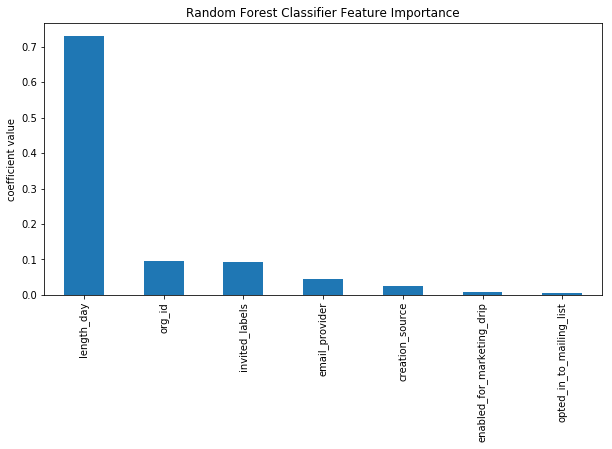

In [349]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
feature_importance['coef'].nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()

In [350]:
#define func to find ecdf of dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [362]:
adopted = feature_df.length_day.loc[feature_df['adopted_user'] == 1]
not_adopted = feature_df.length_day.loc[feature_df['adopted_user'] == 0]

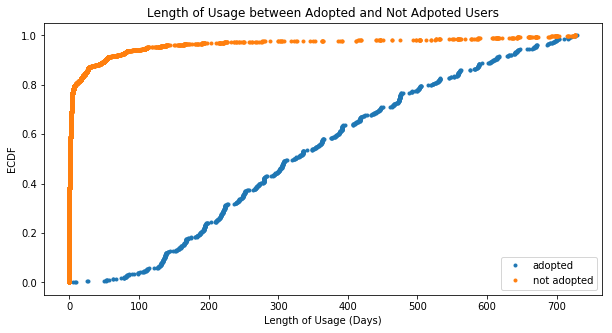

In [360]:
#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(adopted)
x_inactive, y_inactive = ecdf(not_adopted)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('Length of Usage between Adopted and Not Adpoted Users')
plt.xlabel('Length of Usage (Days)')
plt.ylabel('ECDF')
plt.legend(['adopted', 'not adopted'])
plt.show()

In [368]:
print('maximum length of time usage for non-adoped user is:', feature_df.length_day.loc[feature_df['adopted_user'] == 0].max())
print('average length of time usage for non-adoped user is:', int(feature_df.length_day.loc[feature_df['adopted_user'] == 0].mean()))

maximum length of time usage for non-adoped user is: 727
average length of time usage for non-adoped user is: 25


In [367]:
print('maximum length of time usage for adoped user is:', feature_df.length_day.loc[feature_df['adopted_user'] == 1].max())
print('average length of time usage for adoped user is:', int(feature_df.length_day.loc[feature_df['adopted_user'] == 1].mean()))

maximum length of time usage for adoped user is: 729
average length of time usage for adoped user is: 349


Here it is apparent that non-adopted users use the product for purposes(using the product when signing up or rarely),adopted users have used the product periodically as the ECDF curve is very close to uniform distribution along the time span.